#LIBERARIES

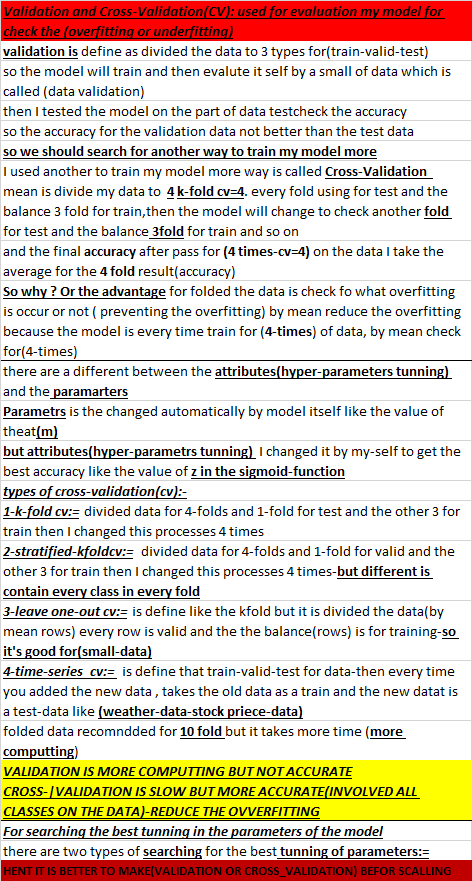

In [147]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#---------------------------------------------------------------------------------------------->GRID_SEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->SCORE_FOR_REGRESSION
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->CROSS_VALID
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit,TimeSeriesSplit
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
#---------------------------------------------------------------------------------------------->REGRESSION_MODELS(XGBRegressor,LinearRegression)
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import missingno as msng
#---------------------------------------------------------------------------------------------->EXCEPTION_WARNING
import warnings
warnings.filterwarnings("ignore")

#LOAD_DATA

In [148]:
df = pd.read_csv('/content/insurance-data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

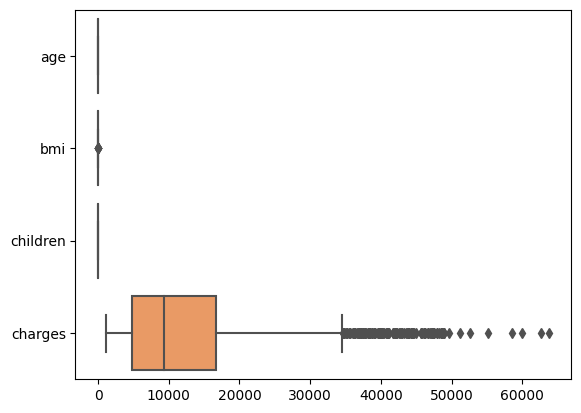

In [149]:
sns.boxplot(data=df,palette='rainbow',orient='h')

#ENCODING

In [150]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [151]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [152]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [153]:
ENCODING_MAP = {'yes': 1,'no':0}
df['smoker'] = [ENCODING_MAP[i] for i in df['smoker']]

In [154]:
ENCODING_MAP = {'female': 1,'male':0}
df['sex'] = [ENCODING_MAP[i] for i in df['sex']]

In [155]:
df_dummies = pd.get_dummies(df['region'],drop_first=True, prefix='region')
new_df = pd.concat([df, df_dummies], axis=1)
new_df.drop(['region'],axis=1,inplace=True)

In [156]:
new_df['smoker'].unique()

array([1, 0])

In [157]:
new_df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0
1334,18,1,31.920,0,0,2205.98080,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,1


#SPLITTING_DATA

In [158]:
x=new_df.loc[:,new_df.columns != 'charges']
y=new_df['charges']

#VALIDATION

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid =train_test_split(x_train,y_train,test_size=.1, random_state=42)

In [160]:
L_REG=LinearRegression()

In [161]:
score_V=cross_val_score(L_REG,x_train,y_train) # VALIDATION
score_V

array([0.70857149, 0.70988275, 0.74757507, 0.71805822, 0.78259862])

In [162]:
score_V=score_V.mean()*100
score_V

73.33372278006021

In [163]:
G_L_REG_V= GridSearchCV(
            estimator=LinearRegression(),
           param_grid= {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_V= G_L_REG_V.fit(x_train,y_train)
print(grid_result_V.best_params_)

{'fit_intercept': True, 'positive': True}


In [164]:
y_pred_test_L_V=grid_result_V.predict(x_test)
score_test_L_V=r2_score(y_test,y_pred_test_L_V)*100
print("score_test_L_V for our test dataset with tuning is : {:.2f}%".format(score_test_L_V))

score_test_L_V for our test dataset with tuning is : 78.11%


#CROSS_VALIDATION(K_FOLD)

In [165]:
L_REG=LinearRegression()

In [166]:
kf=KFold(n_splits=3,shuffle=True,random_state=42)
score_KF=cross_val_score(L_REG,x_train,y_train,cv=kf) # kfold
score_KF

array([0.75363157, 0.74019267, 0.69932893])

In [167]:
score_KF=score_KF.mean()*100
score_KF

73.1051058057298

In [168]:
G_L_REG_KF= GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]},cv=kf)
grid_result_KF= G_L_REG_KF.fit(x_train,y_train)
print(grid_result_KF.best_params_)

{'fit_intercept': True, 'positive': True}


In [169]:
y_pred_test_L_KF=grid_result_KF.predict(x_test)
score_test_L_KF=r2_score(y_test,y_pred_test_L_KF)*100
print("score_test_L_KF for our testing dataset with tuning is : {:.2f}%".format(score_test_L_KF))

score_test_L_KF for our testing dataset with tuning is : 78.11%


#CROSS_VALIDATION(TimeSeriesSplit)

In [170]:
TSCV = TimeSeriesSplit(n_splits=3)
score_TSCV=cross_val_score(L_REG,x_train,y_train,cv=TSCV) # TimeSeriesSplit
score_TSCV

array([0.72323155, 0.73570286, 0.76903589])

In [171]:
score_TSCV=score_TSCV.mean()*100
score_TSCV

74.26567647844396

In [172]:
G_L_REG_TSCV= GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]},cv=TSCV)
grid_result_TSCV= G_L_REG_TSCV.fit(x_train,y_train)
print(grid_result_TSCV.best_params_)

{'fit_intercept': True, 'positive': False}


In [173]:
y_pred_test_L_TSCV=grid_result_TSCV.predict(x_test)
score_test_L_TSCV=r2_score(y_test,y_pred_test_L_TSCV)*100
print("score_test_L_TSCV for our testing dataset with tuning is : {:.2f}%".format(score_test_L_TSCV))

score_test_L_TSCV for our testing dataset with tuning is : 78.27%


#CROSS_VALIDATION(ShuffleSplit)

In [174]:
SS = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score_SS=cross_val_score(L_REG,x_train,y_train,cv=SS) # ShuffleSplit
score_SS

array([0.7232369 , 0.80165744, 0.74025964, 0.77976423, 0.77104301])

In [175]:
score_SS=score_SS.mean()*100
score_SS

76.31922442225643

In [176]:
G_L_REG_SS= GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]},cv=SS)
grid_result_SS= G_L_REG_SS.fit(x_train,y_train)
print(grid_result_SS.best_params_)

{'fit_intercept': True, 'positive': True}


In [177]:
y_pred_test_L_SS=grid_result_SS.predict(x_test)
score_test_L_SS=r2_score(y_test,y_pred_test_L_SS)*100
print("score_test_L_SS for our testing dataset with tuning is : {:.2f}%".format(score_test_L_SS))

score_test_L_SS for our testing dataset with tuning is : 78.11%


#FINAL_RESULTS_SCORES_USING_CROSS_VALID_PLOTTING

Text(0.5, 1.0, 'SCORE_CORSS_VALID_APPLIED_ON_REGRESSION')

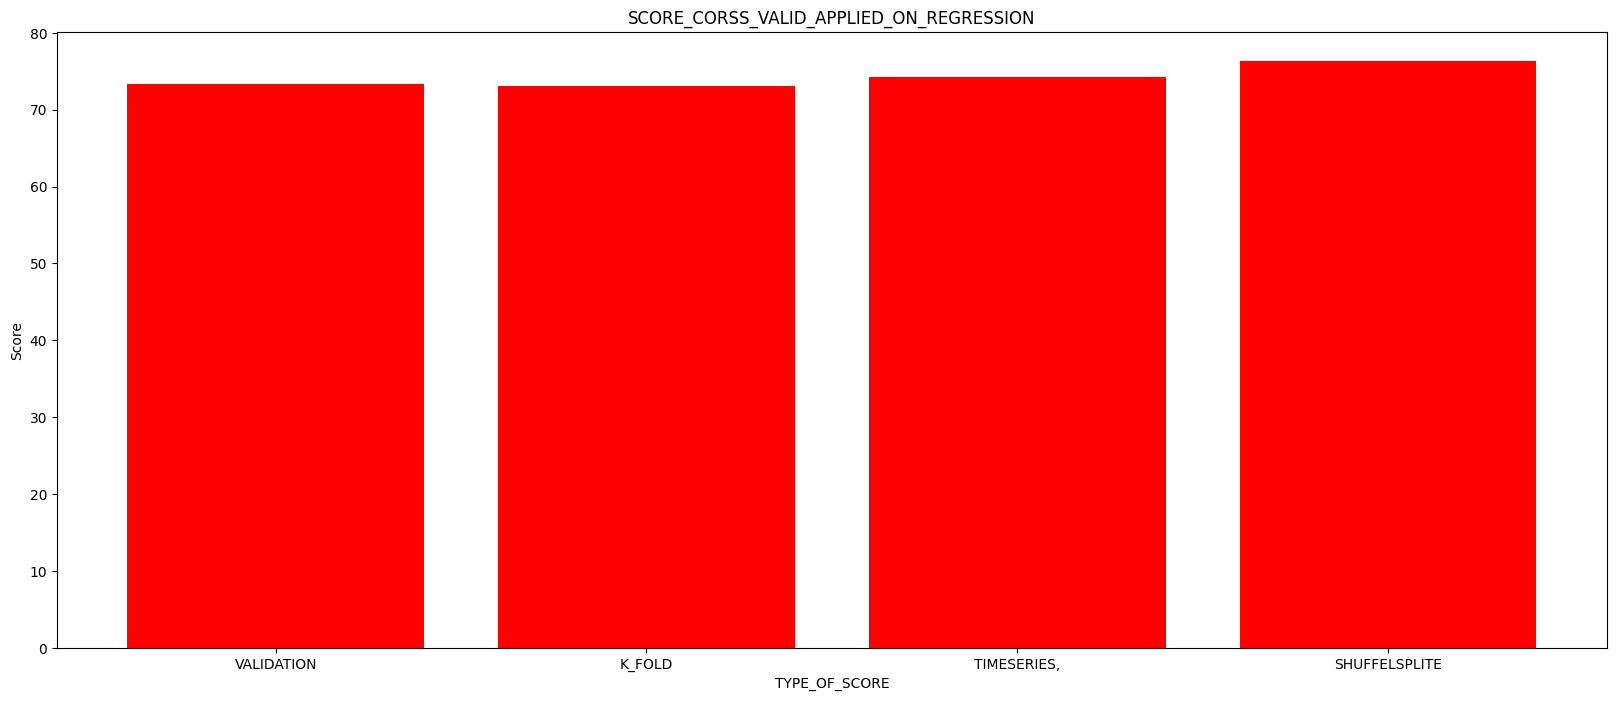

In [178]:
X= ["VALIDATION","K_FOLD","TIMESERIES,","SHUFFELSPLITE"]
Y=[score_V,score_KF,score_TSCV,score_SS]
plt.figure(figsize=(20,8))
plt.bar(X , Y,color='RED')
plt.xlabel("TYPE_OF_SCORE")
plt.ylabel("Score")
plt.title("SCORE_CORSS_VALID_APPLIED_ON_REGRESSION")

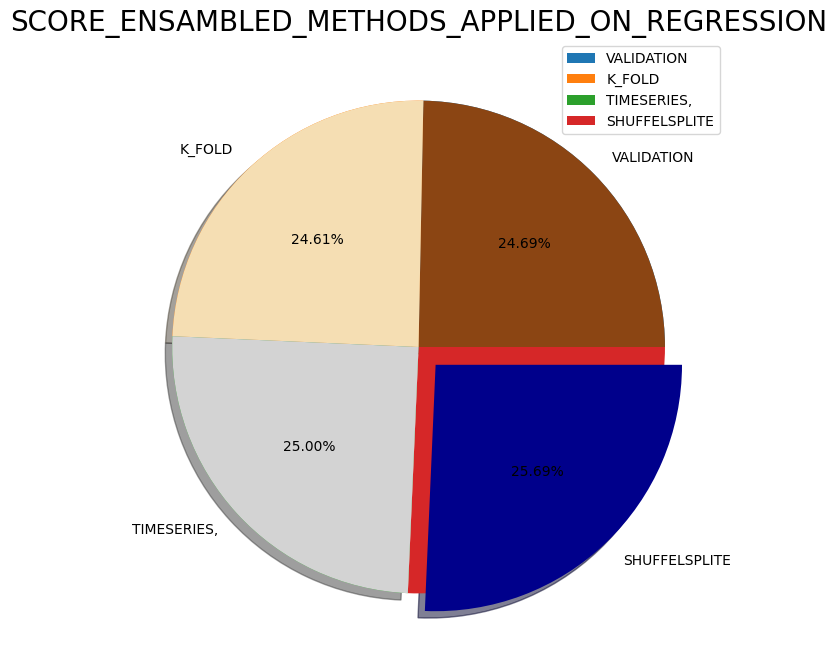

In [179]:
X= ["VALIDATION","K_FOLD","TIMESERIES,","SHUFFELSPLITE"]
DATA=[73.33372278006021,73.1051058057298,74.26567647844396,76.31922442225643]
colors = ['saddlebrown', 'wheat','lightgrey', 'darkblue']
EXPLOD = [0.0, 0.0, 0.0,0.1]
plt.figure(figsize=(50, 8))
plt.pie(DATA)
plt.title("SCORE_ENSAMBLED_METHODS_APPLIED_ON_REGRESSION", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()

#FINAL_RESULTS_MODELS_SCORES_USING_CROSS_VALID_PLOTTING

Text(0.5, 1.0, 'SCORE_MODEL_CORSS_VALID_APPLIED_ON_REGRESSION')

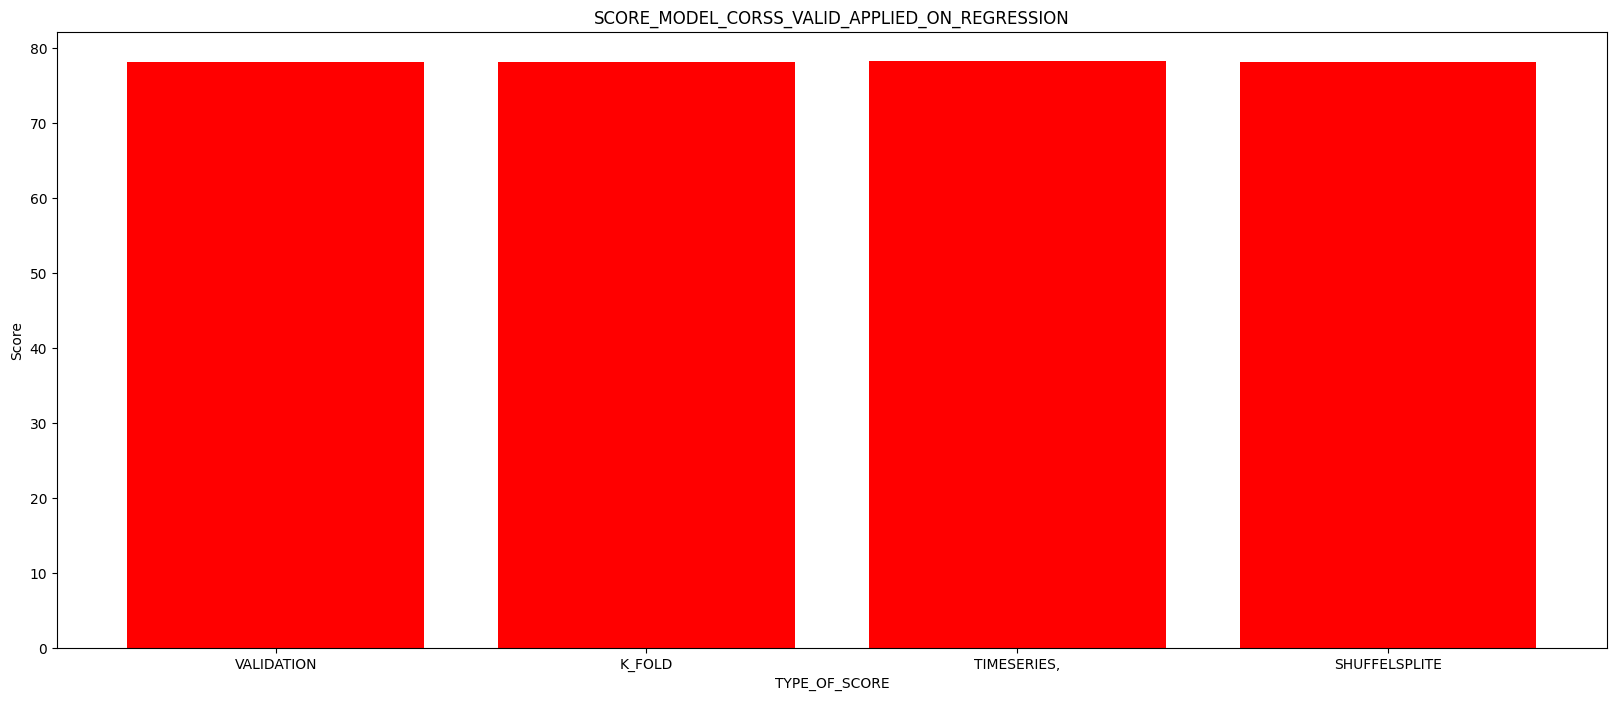

In [180]:
X= ["VALIDATION","K_FOLD","TIMESERIES,","SHUFFELSPLITE"]
Y=[score_test_L_V,score_test_L_KF,score_test_L_TSCV,score_test_L_SS]
plt.figure(figsize=(20,8))
plt.bar(X , Y,color='RED')
plt.xlabel("TYPE_OF_SCORE")
plt.ylabel("Score")
plt.title("SCORE_MODEL_CORSS_VALID_APPLIED_ON_REGRESSION")

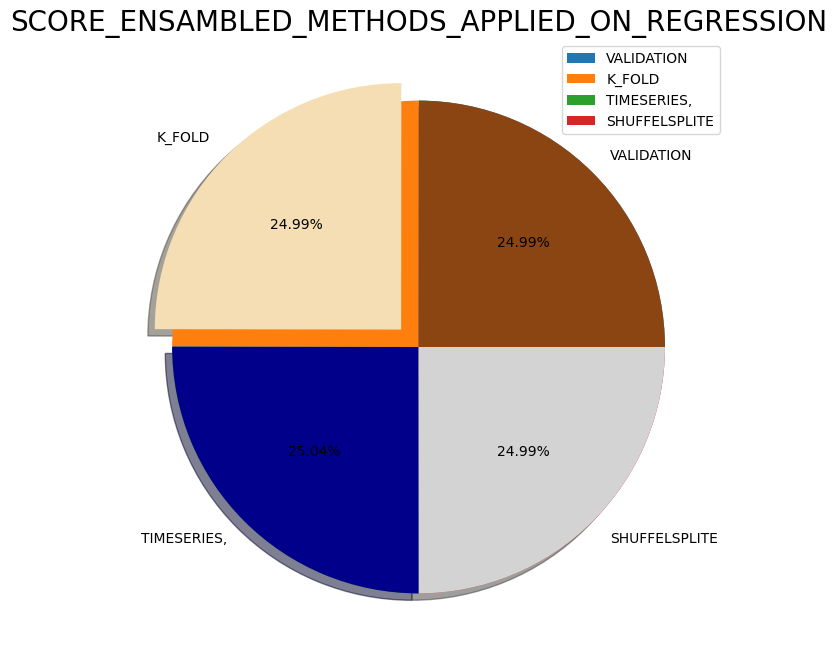

In [181]:
X= ["VALIDATION","K_FOLD","TIMESERIES,","SHUFFELSPLITE"]
DATA=[78.11239758606128,78.11239758606128,78.27205691672347,78.11239758606128]
colors = ['saddlebrown', 'wheat','darkblue', 'lightgrey']
EXPLOD = [0.0, 0.1, 0.0,0.0]
plt.figure(figsize=(50, 8))
plt.pie(DATA)
plt.title("SCORE_ENSAMBLED_METHODS_APPLIED_ON_REGRESSION", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()